# SentimentAnalysis
## Linear Logistic Regression
### [ Opiniones VS Polaridades ]
#### Ing. Luis Felipe Narvaez Gomez. E-mail: luis.narvaez@usantoto.edu.co. Cod: 2312660. Facultad de Ingenieria de Sistemas. USTA.

### Importar Librerias

In [1]:
# Librerias DataFrame
import numpy as np
import pandas as pd
import re

In [2]:
# Librerias Graficos e imagenes
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from IPython.display import Image

In [3]:
# Importar STOPWORDS
import nltk
nltk.download("stopwords")
from nltk.corpus import stopwords

# Vectorizar
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

[nltk_data] Downloading package stopwords to C:\Users\Ruiso Local
[nltk_data]     Pc\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [4]:
# Datos de Clasificacion
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [5]:
# Exportar data
import pickle

### Leer un archivo XLSX

In [6]:
# Leer el archivo de tipo XLSX
dfData = pd.read_excel("Rest_Mex_2022_Sentiment_Analysis_Track_Train.xlsx")

In [7]:
dfData.head(3)

,Title,Opinion,Polarity,Attraction
0,Pésimo lugar,Piensen dos veces antes de ir a este hotel te ...,1,Hotel
1,No vayas a lugar de Eddie,Cuatro de nosotros fuimos recientemente a Eddi...,1,Restaurant
2,Mala relación calidad-precio,seguiré corta y simple: limpieza\n- bad. Tengo...,1,Hotel


### Conociendo la Data

<AxesSubplot:xlabel='Attraction'>

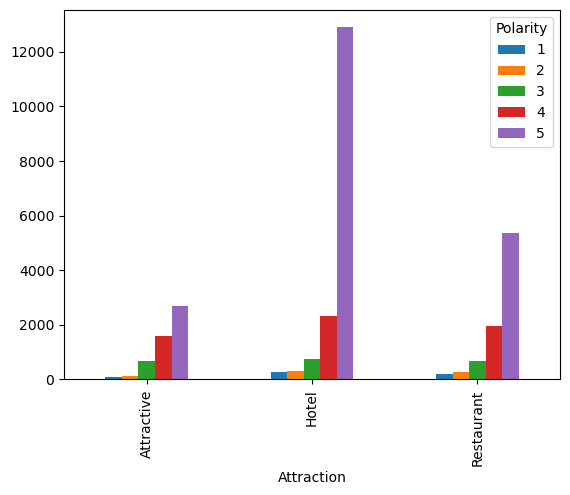

In [9]:
sentiment = dfData.groupby(['Attraction',
                            'Polarity']).Polarity.count().unstack()
sentiment.plot(kind="bar")

### Features y Labels

In [10]:
dfData.keys()

Index(['Title', 'Opinion', 'Polarity', 'Attraction'], dtype='object')

In [11]:
# [0]       [1]         [2]        [3]
# ['Title', 'Opinion', 'Polarity', 'Attraction']

features = dfData.iloc[:,1].values  # Opinion
labels = dfData.iloc[:,2].values    # Polarity

### Limpiar Dataset

In [12]:
# Limpiar el dataset de todos los caracteres especiales.
processed_features = []

for sentence in range(0, len(features)):
    #Remove all the special characters
    processed_feature = re.sub(r'\W',' ', str(features[sentence]))
    #remove all single characters
    processed_feature = re.sub(r'\s+[a-zA-Z]\s+', ' ', processed_feature)
    #remove single characters from the start
    processed_feature = re.sub(r'\^[a-zA-Z]\s+', ' ', processed_feature)
    #substituting multiple spaces with single space
    processed_feature = re.sub(r'\s+', ' ', processed_feature, flags=re.I)
    #removing prefixxed 'b'
    processed_feature = re.sub(r'^b\s+', '', processed_feature)
    #converting to lowercase
    processed_feature = processed_feature.lower()
    #añadirlo al arreglo alv
    processed_features.append(processed_feature)

In [13]:
# En el anterior paso tenemos nuestra nueva 
# columna de features (Opiniones)

In [14]:
vectorizer = TfidfVectorizer (max_features=2500, 
                              min_df = 7, 
                              max_df=0.8, 
                              stop_words=stopwords.words('spanish'))

In [15]:
processed_features = vectorizer.fit_transform(processed_features).toarray()

In [16]:
X = processed_features

In [17]:
y = labels

### Logistic Regression

In [18]:
from sklearn.linear_model import LogisticRegression

In [19]:
from sklearn.model_selection import train_test_split

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

In [20]:
import random 
semilla = random.randint(0,100)

X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size = 0.2,
                                                    random_state=semilla,
                                                    stratify=y)

In [21]:
print(semilla)

59


In [22]:
clf = LogisticRegression(max_iter=70)

In [23]:
clf.fit(X_train, y_train)

D:\SOFTWARE\Anaconda 3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=70)

In [24]:
print(clf.score(X_test, y_test))

0.7214959457223233


In [25]:
predictions = (clf.predict(X_test))

In [26]:
print(confusion_matrix(y_test, predictions))

[[  21    9   36   13   30]
 [  11   11   45   40   39]
 [   5    1   94  143  181]
 [   1    2   48  329  796]
 [   2    1   20  260 3905]]


In [27]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           1       0.53      0.19      0.28       109
           2       0.46      0.08      0.13       146
           3       0.39      0.22      0.28       424
           4       0.42      0.28      0.34      1176
           5       0.79      0.93      0.85      4188

    accuracy                           0.72      6043
   macro avg       0.52      0.34      0.38      6043
weighted avg       0.68      0.72      0.69      6043



In [28]:
print(accuracy_score(y_test, predictions))

0.7214959457223233
